<a href="https://colab.research.google.com/github/mohmaed7777/Data-Analysis-with-python-/blob/master/EDA_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Require libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [5]:
df = pd.read_csv('/content/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
df.columns.tolist()

['Id',
 'SepalLengthCm',
 'SepalWidthCm',
 'PetalLengthCm',
 'PetalWidthCm',
 'Species']

In [8]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [9]:
df.shape[0]

150

In [10]:
New_species = df['Species'].str.replace('Iris-', '')
New_species

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: Species, Length: 150, dtype: object

In [11]:
df['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

In [12]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [13]:
stats_df = df.describe()
stats_df.loc['range'] = stats_df.loc['max'] - stats_df.loc['min']
stats_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000
range,149.000000,3.600000,2.400000,5.900000,2.400000


In [14]:
# specify the rows that we actually want to look like which are going to be the mean, 25%, 50%, 75% and the range: 

stats_df = df.describe()
stats_df.loc['range'] = stats_df.loc['max'] - stats_df.loc['min']
out_feilds = ['mean','25%', '50%','75%', 'range']
stats_df.loc[out_feilds]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
mean,75.50,5.843333,3.054,3.758667,1.198667
25%,38.25,5.100000,2.800,1.600000,0.300000
50%,75.50,5.800000,3.000,4.350000,1.300000
75%,112.75,6.400000,3.300,5.100000,1.800000
range,149.00,3.600000,2.400,5.900000,2.400000


In [15]:
# leavrage groupby() method: 

stats_df = df.describe()
stats_df.loc['range'] = stats_df.loc['max'] - stats_df.loc['min']
out_feilds = ['mean', '25%','50%','75%','range']
stats_df = stats_df.loc[out_feilds]
stats_df.rename({'50%': 'median'}, inplace=True)
stats_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
mean,75.50,5.843333,3.054,3.758667,1.198667
25%,38.25,5.100000,2.800,1.600000,0.300000
median,75.50,5.800000,3.000,4.350000,1.300000
75%,112.75,6.400000,3.300,5.100000,1.800000
range,149.00,3.600000,2.400,5.900000,2.400000


In [16]:
df.groupby('Species').mean()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,25.5,5.006,3.418,1.464,0.244
Iris-versicolor,75.5,5.936,2.770,4.260,1.326
Iris-virginica,125.5,6.588,2.974,5.552,2.026


In [17]:
df.groupby('Species').median()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,25.5,5.0,3.4,1.50,0.2
Iris-versicolor,75.5,5.9,2.8,4.35,1.3
Iris-virginica,125.5,6.5,3.0,5.55,2.0


In [18]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

[Text(0, 0.5, 'Spetal weidth'),
 Text(0.5, 0, 'Spetal length'),
 Text(0.5, 1.0, 'Spetal length vs Spetal weidth')]

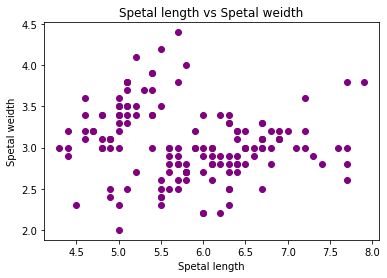

In [22]:
ax = plt.axes()

ax.scatter(df.SepalLengthCm, df.SepalWidthCm, color='purple')
ax.set(xlabel='Spetal length',
       ylabel='Spetal weidth',
       title='Spetal length vs Spetal weidth')

[Text(0, 0.5, 'Frequncy'),
 Text(0.5, 0, 'The Spetal length per cm'),
 Text(0.5, 1.0, 'The Frequence of Spetal length per cm')]

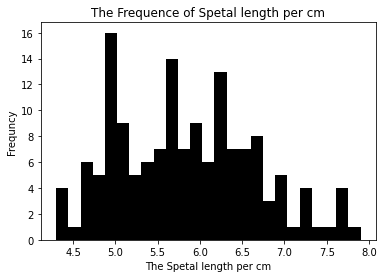

In [23]:
# Create a histogram: 
ax = plt.axes()

ax.hist(df.SepalLengthCm, bins=25, color='black')
ax.set(xlabel='The Spetal length per cm',
       ylabel='Frequncy',
       title='The Frequence of Spetal length per cm')